In [1]:
import sys
import os

## Number of Clauses

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

results_df1 = pd.read_csv('imdb_nclauses_5000examples_6924002.csv')
results_df2 = pd.read_csv('imdb_nclauses_5000examples_1512609.csv')
results_df3 = pd.read_csv('imdb_nstatebits_5000examples_351579.csv')
results_df4 = pd.read_csv('imdb_nstatebits_5000examples_553189.csv')
results_df5 = pd.read_csv('imdb_sparam_5000examples_452811.csv')
#results_df2.drop(results_df2[results_df2['num_clauses']==5000].index, inplace=True)
results_df = pd.concat([results_df1, results_df2, results_df3, results_df4, results_df5])
#results_df=results_df1
results_df['time'] = -1*results_df['time']

In [3]:
result_dfs = list(results_df.groupby(['epoch', 's', 'num_clauses', 
                    'num_states', 'noise_level']).mean().reset_index().groupby(['s', 'num_clauses', 
                                                                                'num_states', 'noise_level']))

In [23]:
summary_df = results_df[results_df['epoch']>20].groupby(['s', 'num_clauses', 
                                            'num_states', 'noise_level']).mean().reset_index()[['s', 'num_clauses', 
                                            'num_states', 'noise_level', 'accuracy', 'time']]#.sort_values('accuracy')


In [24]:
summary_df

,s,num_clauses,num_states,noise_level,accuracy,time
0,3.0,10000.0,256.0,0.0,83.648690,965.492747
1,30.0,5000.0,256.0,0.0,84.892069,50.654432
2,30.0,10000.0,16.0,0.0,76.751724,131.260213
3,30.0,10000.0,256.0,0.0,86.936247,86.227598
4,30.0,10000.0,65536.0,0.0,87.541103,114.773859
5,30.0,15000.0,256.0,0.0,87.712000,123.862581


In [25]:
colnames_str = "Accuracy (\%) & Training Time (s) & s & Number of States & Number of Clauses \\\ \\hline \\hline \n"
full_table_str = colnames_str
for idx, row in summary_df.iterrows():
    if row['noise_level'] == 0:
        row_str = str(row['accuracy'])[0:5]+" & "+ str(row['time']).split('.')[0] +" & "+str(row['s'])+" & "+\
        str(row['num_states']).split('.')[0]+" & "+str(row['num_clauses']).split('.')[0]+" \\\ \\hline \n"
        full_table_str = full_table_str + row_str
        
print(full_table_str)
with open("individparam_imgs/imdb_individ_param_results.txt", "w") as text_file:
    text_file.write(full_table_str)

Accuracy (\%) & Training Time (s) & s & Number of States & Number of Clauses \\ \hline \hline 
83.64 & 965 & 3.0 & 256 & 10000 \\ \hline 
84.89 & 50 & 30.0 & 256 & 5000 \\ \hline 
76.75 & 131 & 30.0 & 16 & 10000 \\ \hline 
86.93 & 86 & 30.0 & 256 & 10000 \\ \hline 
87.54 & 114 & 30.0 & 65536 & 10000 \\ \hline 
87.71 & 123 & 30.0 & 256 & 15000 \\ \hline 



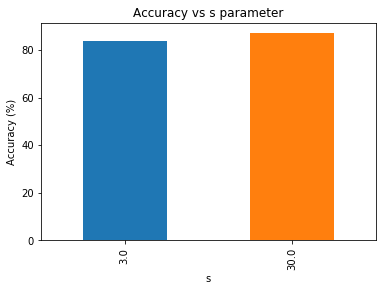

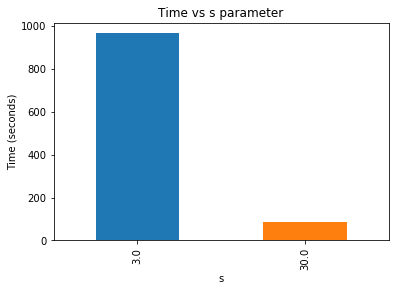

In [7]:
summary_df[(summary_df['noise_level']==0)&
           (summary_df['num_states']==256)&
           (summary_df['num_clauses']==10000)].plot.bar(x='s', y='accuracy', legend = False)
plt.title("Accuracy vs s parameter")
plt.ylabel("Accuracy (%)")
plt.show()
summary_df[(summary_df['noise_level']==0)&
           (summary_df['num_states']==256)&
           (summary_df['num_clauses']==10000)].plot.bar(x='s', y='time', legend = False)
plt.title("Time vs s parameter")
plt.ylabel("Time (seconds)")
plt.show()

In [8]:
summary_df

,s,num_clauses,num_states,noise_level,accuracy,time
0,3.0,10000.0,256.0,0.0,83.648690,965.492747
1,30.0,5000.0,256.0,0.0,84.892069,50.654432
2,30.0,10000.0,16.0,0.0,76.751724,131.260213
3,30.0,10000.0,256.0,0.0,86.936247,86.227598
4,30.0,10000.0,65536.0,0.0,87.541103,114.773859
5,30.0,15000.0,256.0,0.0,87.712000,123.862581


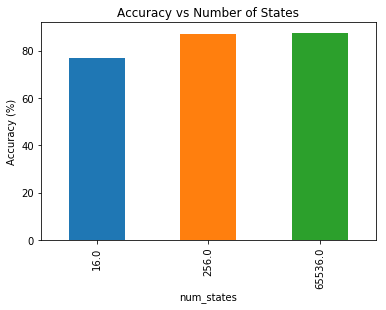

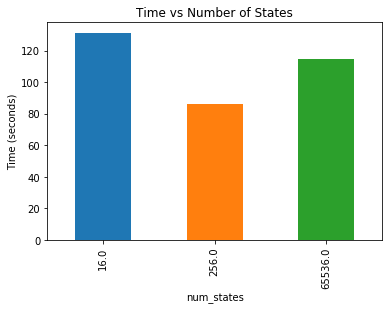

In [9]:
summary_df[(summary_df['noise_level']==0)&
           (summary_df['s']==30)&
           (summary_df['num_clauses']==10000)].plot.bar(x='num_states', y='accuracy', legend = False)
plt.title("Accuracy vs Number of States")
plt.ylabel("Accuracy (%)")
plt.show()
summary_df[(summary_df['noise_level']==0)&
           (summary_df['s']==30)&
           (summary_df['num_clauses']==10000)].plot.bar(x='num_states', y='time', legend = False)
plt.title("Time vs Number of States")
plt.ylabel("Time (seconds)")
plt.show()

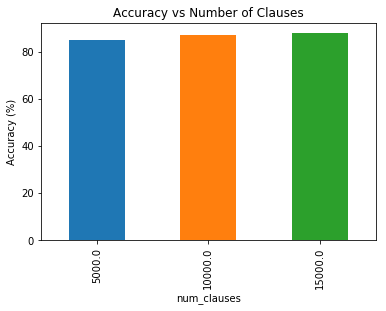

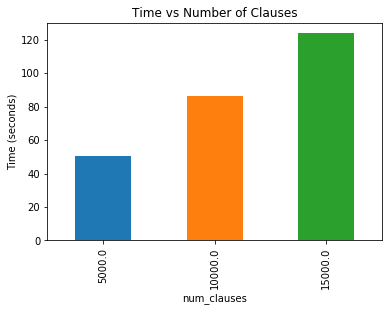

In [10]:
summary_df[(summary_df['noise_level']==0)&
           (summary_df['s']==30)&
           (summary_df['num_states']==256)].plot.bar(x='num_clauses', y='accuracy', legend = False)
plt.title("Accuracy vs Number of Clauses")
plt.ylabel("Accuracy (%)")
plt.show()
summary_df[(summary_df['noise_level']==0)&
           (summary_df['s']==30)&
           (summary_df['num_states']==256)].plot.bar(x='num_clauses', y='time', legend = False)
plt.title("Time vs Number of Clauses")
plt.ylabel("Time (seconds)")
plt.show()

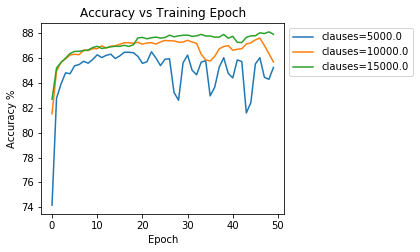

In [19]:
ax1 = None
#(30.0, 5000.0, 256.0, 0.0)
for vals, result_df in result_dfs:
    if (vals[0] == 30) and (vals[2] == 256) and (vals[3]==0):
        if ax1 == None:
            ax1 = result_df.plot(x='epoch', y='accuracy', label="clauses="+str(vals[1]))
        else:
            result_df.plot(x='epoch', y='accuracy', label="clauses="+str(vals[1]), ax=ax1)
plt.legend(bbox_to_anchor=(1,1))   
plt.title("Accuracy vs Training Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy %")
plt.tight_layout(rect=[0,0.1,0.7,1])
plt.savefig("individparam_imgs/nclauses_accvsepoch.eps")
plt.show()

## Number of State Bits

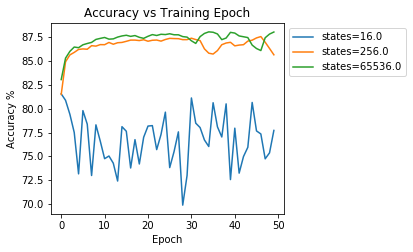

In [17]:
ax1 = None
#(30.0, 5000.0, 256.0, 0.0)
for vals, result_df in result_dfs:
    if (vals[0] == 30) and (vals[1] == 10000) and (vals[3]==0):
        if ax1 == None:
            ax1 = result_df.plot(x='epoch', y='accuracy', label="states="+str(vals[2]))
        else:
            result_df.plot(x='epoch', y='accuracy', label="states="+str(vals[2]), ax=ax1)
plt.legend(bbox_to_anchor=(1,1))   
plt.title("Accuracy vs Training Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy %")
plt.tight_layout(rect=[0,0.1,0.7,1])
plt.savefig("individparam_imgs/nstates_accvsepoch.eps")
plt.show()

## S param

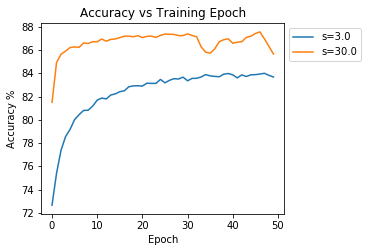

In [18]:
result_dfs = list(results_df.groupby(['epoch', 's', 'num_clauses', 
                    'num_states', 'noise_level']).mean().reset_index().groupby(['s', 'num_clauses', 
                                                                                'num_states', 'noise_level']))
summary_df = results_df[results_df['epoch']>20].groupby(['s', 'num_clauses', 
                                            'num_states', 'noise_level']).mean().reset_index()[['s', 'num_clauses', 
                                            'num_states', 'noise_level', 'accuracy']]#.sort_values('accuracy')

# summary_df[summary_df['noise_level']==0].plot.bar(y='accuracy')
# plt.show()

ax1 = None
#(30.0, 5000.0, 256.0, 0.0)
for vals, result_df in result_dfs:
    if (vals[2] == 256) and (vals[1] == 10000) and (vals[3]==0):
        if ax1 == None:
            ax1 = result_df.plot(x='epoch', y='accuracy', label="s="+str(vals[0]))
        else:
            result_df.plot(x='epoch', y='accuracy', label="s="+str(vals[0]), ax=ax1)
plt.legend(bbox_to_anchor=(1,1))   
plt.title("Accuracy vs Training Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy %")
plt.tight_layout(rect=[0,0.1,0.7,1])
plt.savefig("individparam_imgs/s_accvsepoch.eps")
plt.show()
